In [1]:
%load_ext autoreload
%autoreload 2
from paths import *

from matplotlib import pyplot as plt
import torch
from src.SERS_dataset import IterDataset, SERSDataset, SERSDatasetNPY
from src.generate_data2 import pseudoVoigtSimulatorTorch
from src.plotting.save_plot import save_plot
# import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# matplotlib style seaborn-whitegrid
plt.style.use('seaborn-whitegrid')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cuda = torch.cuda.is_available()

c:\Users\andre\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Code\bachelor-project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\andre\AppData\Local\Temp\ipykernel_15956\860223644.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
ps = pseudoVoigtSimulatorTorch(500)

C:\Users\andre\AppData\Local\Temp\ipykernel_15956\3646648415.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


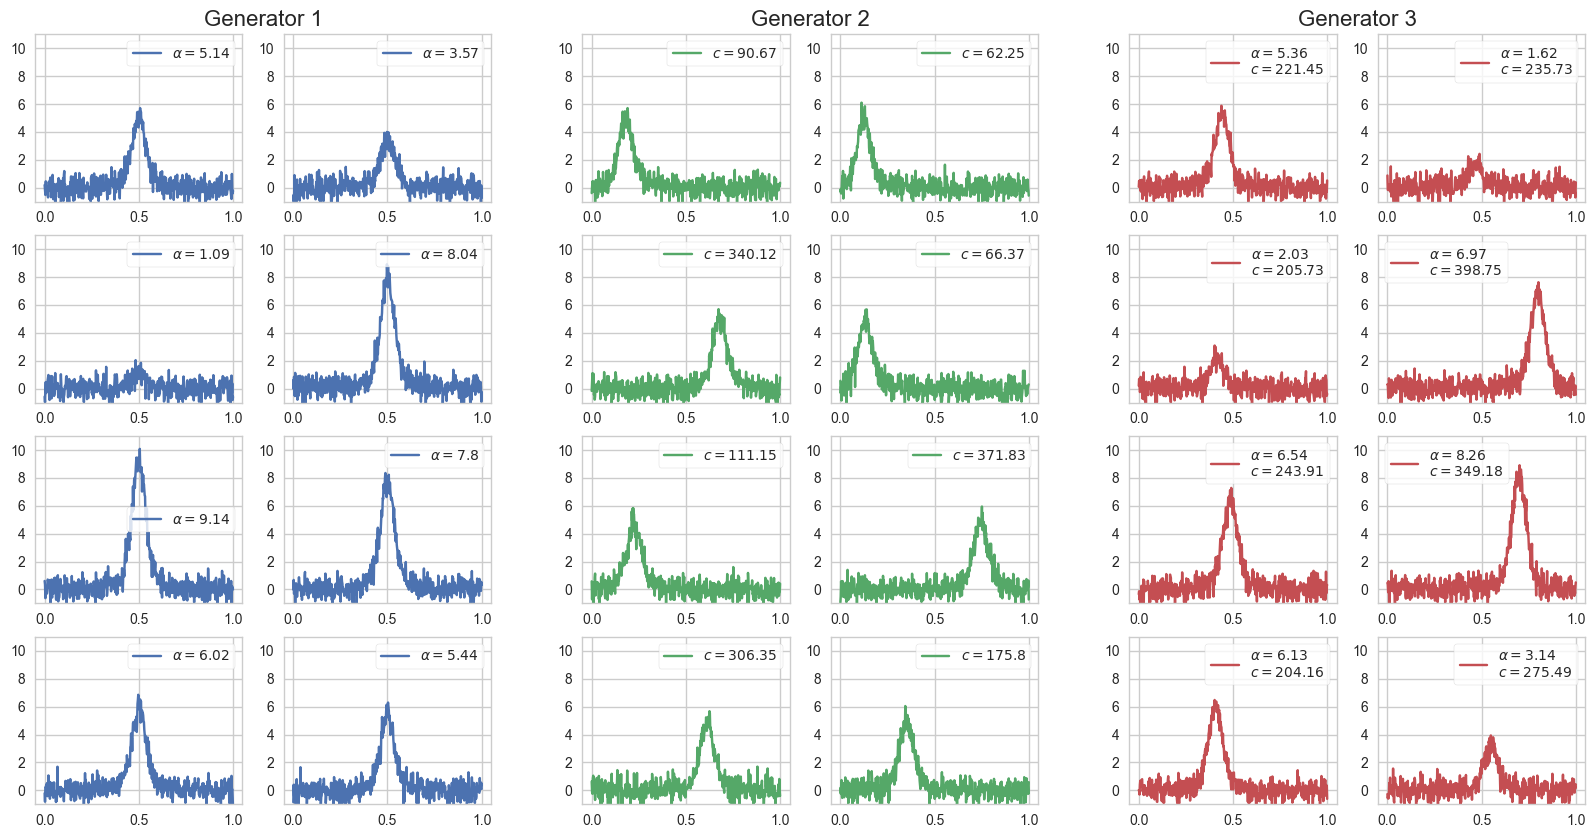

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 10))
outer = gridspec.GridSpec(1, 3, wspace=0.2, hspace=0.2)

# get colors from rcparams
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(3):
    inner = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[i], wspace=0.2, hspace=0.2)
    generator = ps.predefined_generator(i+1)

    # gridspec title 
    # ax = plt.Subplot(fig, outer[i])

    # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(f"Generator {i+1}", fontsize=16)
    ax.axis('off')
    fig.add_subplot(ax)

    for j in range(8):
        ax = plt.Subplot(fig, inner[j])
        # "$\\alpha = 0.5$ \n $\\c = 0.5$"
        x, y = next(iter(generator))

        alpha = np.round(y[3].item(),2)
        c = np.round(y[0].item(),2)

        if i == 0:
            lab = f"$\\alpha = {alpha}$"
        elif i == 1:
            lab = f"$c = {c}$"
        elif i == 2:
            lab = f"$\\alpha = {alpha}$\n$ c = {c}$"

        ax.plot(x, color=colors[i], label = lab)
        ax.set_ylim(-1, 11)
        # add legend box with text
        ax.legend(frameon=True)

        fig.add_subplot(ax)

        
# Make tight layout 
fig.tight_layout()

# save figure
save_plot(fig, "figures/methods/generators", ["png", "eps"])
